In [1]:
import pandas as pd

# Load training and testing data
file_path1 = r"D:\Downloads\Datasets GDSC Project\train.csv"
train_df  = pd.read_csv(file_path1)
file_path2 = r"D:\Downloads\Datasets GDSC Project\test.csv"
test_df = pd.read_csv(file_path2)


In [2]:
print("\nTest data:")
test_df.head()


Test data:


,ID,title,text,subject,date
0,1,U.S. judge presses Trump administration on Dre...,NEW YORK (Reuters) - A U.S. judge on Thursday ...,politicsNews,21-Sep-17
1,2,U.S. judge questions government on Trump's lat...,"GREENBELT, Md. (Reuters) - A U.S. judge on Mon...",politicsNews,16-Oct-17
2,3,U.S. judge questions states seeking to restore...,SAN FRANCISCO (Reuters) - A U.S. judge on Mond...,politicsNews,23-Oct-17
3,4,U.S. judge refuses to halt New York nuclear po...,NEW YORK (Reuters) - A federal judge on Tuesda...,politicsNews,25-Jul-17
4,5,U.S. judge rejects bid to dismiss Indonesian i...,BOSTON (Reuters) - A federal judge on Wednesda...,worldnews,25-Oct-17


In [3]:
print("Train data:")
train_df.head()

Train data:


,ID,title,text,subject,date,class
0,0.0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,News,5-Aug-16,0.0
1,1.0,#BlackLivesMatter Leader To Run For Mayor Of ...,The police shooting of black teen Michael Brow...,News,4-Feb-16,0.0
2,2.0,#BringBackObama Hashtag Blows Up On Twitter A...,The six months since President Donald Trump wa...,News,13-Jul-17,0.0
3,3.0,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,"Last Friday, New Jersey Governor Chris Christi...",News,2-Mar-16,0.0
4,4.0,#MakeAmericaBrannigan: Futurama Voice Actor R...,"The incredibly talented voice actor, Billy Wes...",News,13-Aug-16,0.0


In [4]:
train_df.dropna(subset=['title', 'text'], inplace=True)
train_df = train_df.dropna(subset=['ID'])
train_df['subject'].fillna('Unknown', inplace=True)
train_df['date'].fillna('Unknown', inplace=True)
train_df['class'] = train_df['class'].fillna(train_df['class'].mode()[0])  # Fill with the most frequent value

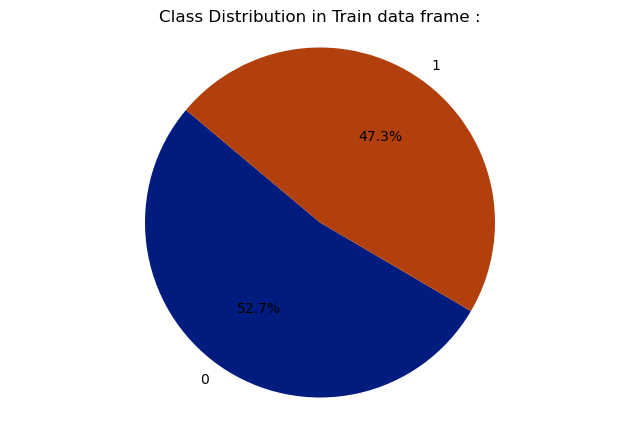

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = train_df['class'].value_counts()
colors = sns.color_palette('dark')

# Create a pie chart
plt.figure(figsize=(8,5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Class Distribution in Train data frame :')
plt.axis('equal')
plt.show()


In [6]:
train_df.duplicated().sum()

0

In [7]:
import warnings
warnings.filterwarnings("ignore")


# Convert 'class' and 'ID' columns to int64
train_df['class'] = train_df['class'].astype('int64')
train_df['ID'] = train_df['ID'].astype('int64')
# Convert 'date' column to datetime
train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce')
test_df['date'] = pd.to_datetime(test_df['date'], errors='coerce')
# Handle NaT values after conversion
train_df['date'].fillna(pd.Timestamp('1970-01-01'), inplace=True)
test_df['date'].fillna(pd.Timestamp('1970-01-01'), inplace=True)

#### Stemming 
>is the process of reducing a word to its base or root form, by removing suffixes and prefixes

In [8]:
# Import the PorterStemmer from nltk
from nltk.stem import PorterStemmer

# Create an instance of PorterStemmer
port_stem = PorterStemmer()

# Example usage
word = "running"
stemmed_word = port_stem.stem(word)
print(f"Original word: {word}, Stemmed word: {stemmed_word}")


Original word: running, Stemmed word: run


In [9]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Initialize PorterStemmer and stopwords list
port_stem = PorterStemmer()
stop_words = set(stopwords.words('english'))

def stemming(text):
    # Replace any non-alphabetic characters in the text variable with a space character
    stemmed_content = re.sub('[^a-zA-Z]', ' ', text)
    # Convert all words into lowercase letters
    stemmed_content = stemmed_content.lower()
    # Split the words into list
    stemmed_content = stemmed_content.split()
    # Generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stop_words]
    # Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content


In [10]:
train_df['text']= train_df['text'].apply(stemming)

In [11]:
train_df['text']

0        world like post donald trump new hashtag after...
1        polic shoot black teen michael brown hand ferg...
2        six month sinc presid donald trump inaugur som...
3        last friday new jersey governor chri christi d...
4        incred talent voic actor billi west probabl be...
                               ...                        
40422    new york reuter u judg hear argument thursday ...
40423    washington reuter u district court judg friday...
40424    new york reuter u judg said inquir whether for...
40425    san diego reuter u district judg gonzalo curie...
40426    new york reuter u judg tuesday direct feder pr...
Name: text, Length: 40406, dtype: object

#### Converting the textual data to numerical data

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

# Initialize CountVectorizer and TfidfTransformer
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(smooth_idf=False)

# Fit and transform CountVectorizer on text data
counts = count_vectorizer.fit_transform(train_df['text'].values)

# Fit and transform TfidfTransformer on counts
tfidf = transformer.fit_transform(counts)


# Split data into train & test data

In [13]:
targets = train_df['class'].values

In [14]:
print(f"target shape: {targets.shape}")
print(f"X shape: {tfidf.shape}")

target shape: (40406,)
X shape: (40406, 2888380)


In [15]:
from sklearn.model_selection import train_test_split

# Assuming `tfidf` is your feature matrix and `targets` are your target labels
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, test_size=0.2, random_state=49)


In [16]:
print(f"The shape of X_train is: {X_train.shape[0]}")
print(f"The shape of X_test is: {X_test.shape[0]}")

The shape of X_train is: 32324
The shape of X_test is: 8082


>**Iterate**

In [17]:
def train(model, model_name):
    model.fit(X_train, y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train, y_train)}")
    print(f"Testing accuracy of {model_name} is {model.score(X_test, y_test)}")

def conf_matrix(model):
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=['Not Fake', 'Fake']
    )
    disp.ax_.set_title('Confusion Matrix')
    plt.show()

def class_report(model):
    print(classification_report(
        y_test,
        model.predict(X_test),
        target_names=['Not Fake', 'Fake']
    ))


In [18]:
# Train Function: Trains a given model on the training data (X_train, y_train) and prints the training and testing accuracies.
def train(model, model_name):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"Training accuracy of {model_name} is {train_accuracy}")
    print(f"Testing accuracy of {model_name} is {test_accuracy}")

# Confusion Matrix Function: Displays a confusion matrix for the given model using ConfusionMatrixDisplay from sklearn.metrics.
from sklearn.metrics import ConfusionMatrixDisplay

def conf_matrix(model):
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=['Not Fake', 'Fake']
    )
    disp.plot()

# Classification Report Function: Prints a classification report showing precision, recall, F1-score, and support.
from sklearn.metrics import classification_report

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(
        y_test,
        y_pred,
        target_names=['Not Fake', 'Fake']
    ))


### LogisticRegression

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [35]:
LR_params={"penalty":['l1', 'l2','elasticnet', 'None'],
           "dual":[True,False],
           "tol":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4,1e+5],
           "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [36]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [37]:
model_lr=LogisticRegression()
GRS = GridSearchCV(model_lr, LR_params, cv = 5)
GRS.fit(X_train, y_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'dual': False, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
0.9936579678849554


In [39]:
model_lr=LogisticRegression(dual=False,penalty="l1",solver="liblinear",tol=0.0001)
model_lr.fit(X_train,y_train)
LR_Pred=model_lr.predict(X_test)
LR_Pred_Train=model_lr.predict(X_train)

In [45]:
print("Classification Report for the test group : \n")
print(classification_report(y_test,LR_Pred),"\n\n")

print()
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(y_train,LR_Pred_Train),"\n\n")


Classification Report for the test group : 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4245
           1       0.99      1.00      0.99      3837

    accuracy                           0.99      8082
   macro avg       0.99      0.99      0.99      8082
weighted avg       0.99      0.99      0.99      8082
 



Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17033
           1       0.99      1.00      0.99     15291

    accuracy                           0.99     32324
   macro avg       0.99      0.99      0.99     32324
weighted avg       0.99      0.99      0.99     32324
 




In [50]:
train(model_lr, 'LogisticRegression')

Training accuracy of LogisticRegression is 0.9944313822546714
Testing accuracy of LogisticRegression is 0.9934422172729522


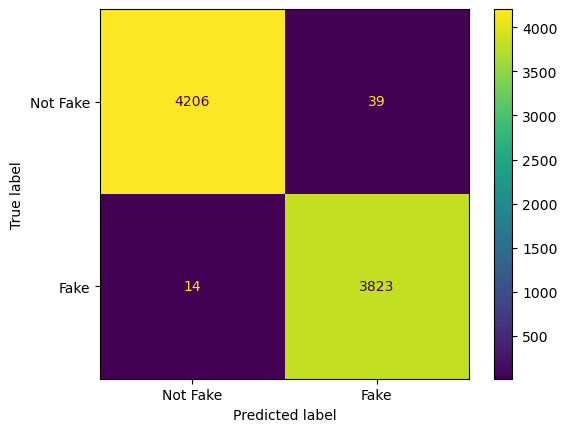

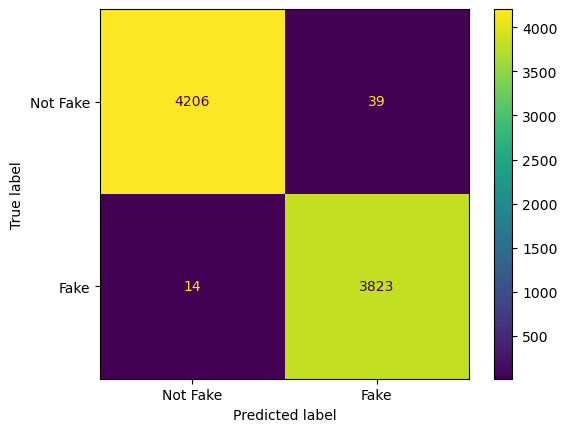

In [46]:
conf_matrix(model_lr)

In [ ]:
#================================================================================================================#

In [18]:
# don't rum 
train(model_lr, 'LogisticRegression')

Training accuracy of LogisticRegression is 0.9928845439920801
Testing accuracy of LogisticRegression is 0.9840386043058649


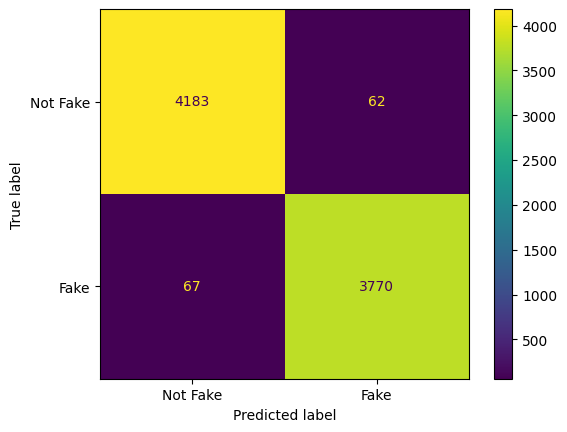

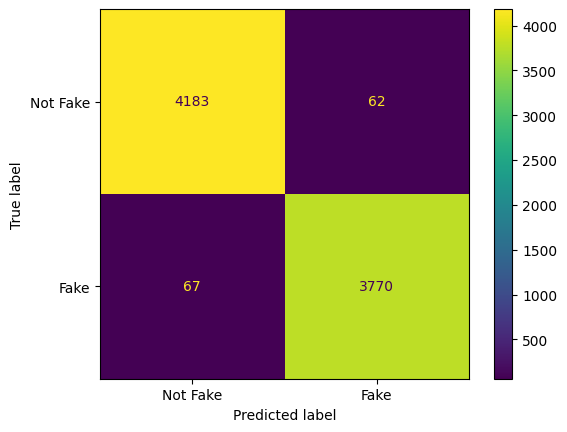

In [19]:
#Don't run 
conf_matrix(model_lr)

In [20]:
#don't run 
class_report(model_lr)

              precision    recall  f1-score   support

    Not Fake       0.98      0.99      0.98      4245
        Fake       0.98      0.98      0.98      3837

    accuracy                           0.98      8082
   macro avg       0.98      0.98      0.98      8082
weighted avg       0.98      0.98      0.98      8082



In [ ]:
#================================================================================================================#

### SVM

In [47]:
from sklearn.svm import SVC

# Now you can create an instance of the SVC class
svc_model = SVC()


In [48]:
train(svc_model, 'SVM')

Training accuracy of SVM is 0.9998453161737408
Testing accuracy of SVM is 0.9912150457807474


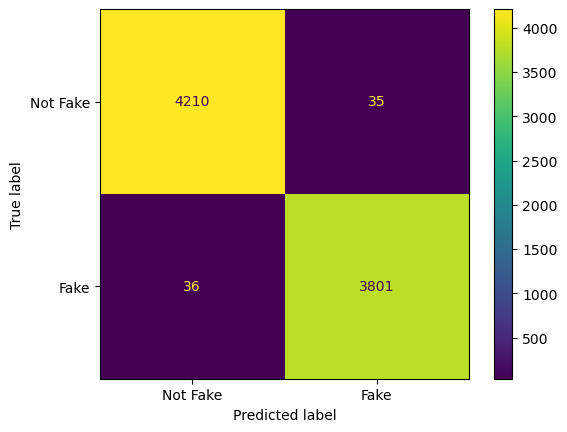

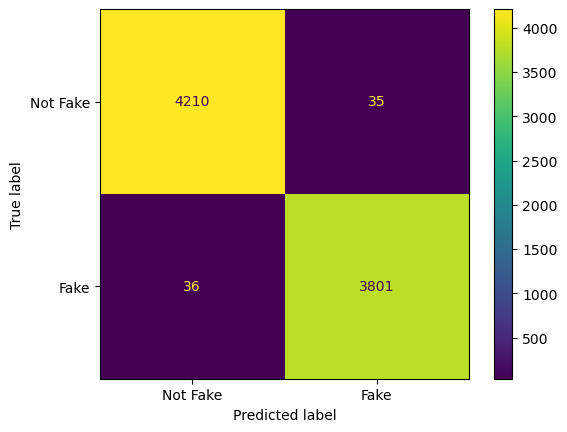

In [49]:
conf_matrix(svc_model)

In [52]:
class_report(svc_model)

              precision    recall  f1-score   support

    Not Fake       0.99      0.99      0.99      4245
        Fake       0.99      0.99      0.99      3837

    accuracy                           0.99      8082
   macro avg       0.99      0.99      0.99      8082
weighted avg       0.99      0.99      0.99      8082



### DecisionTreeClassifie

In [54]:
from sklearn.tree import DecisionTreeClassifier
depth_num= range(50, 71, 2)
training_acc= []
testing_acc = []
for depth in depth_num:
    tree_model = DecisionTreeClassifier(max_depth=depth,random_state=42)
    tree_model.fit(X_train,y_train)
    training_acc.append(tree_model.score(X_train,y_train))
    testing_acc.append(tree_model.score(X_test,y_test))

In [55]:
print("Training Accuracy Scores:", training_acc[:3])
print("testing Accuracy Scores:", testing_acc[:3])

Training Accuracy Scores: [0.9999690632347482, 0.9999690632347482, 0.9999690632347482]
testing Accuracy Scores: [0.9955456570155902, 0.996040584013858, 0.9964117792625587]


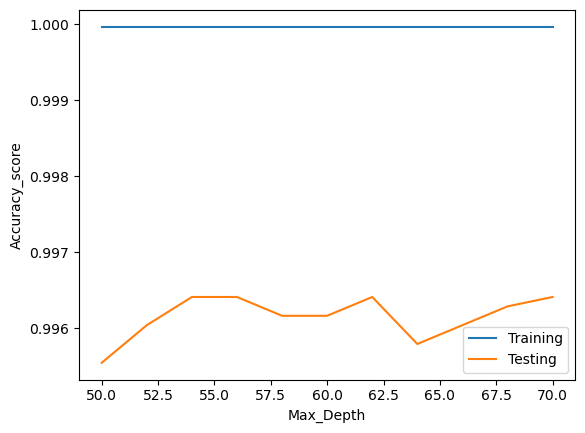

In [56]:
plt.plot(depth_num , training_acc , label= 'Training')
plt.plot(depth_num , testing_acc , label= 'Testing')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy_score')
plt.legend();

In [58]:
class_report(tree_model)

              precision    recall  f1-score   support

    Not Fake       1.00      1.00      1.00      4245
        Fake       1.00      1.00      1.00      3837

    accuracy                           1.00      8082
   macro avg       1.00      1.00      1.00      8082
weighted avg       1.00      1.00      1.00      8082



### RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier 

rfc_model= RandomForestClassifier(random_state=42)


In [ ]:
# hasn't been run
params={
    "n_estimators": range(50,125,25),
    "max_depth": range(60,81,2)
}
params

In [61]:
# hasn't been run
rfc_model = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs= -1,
    verbose=1
)

In [20]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# hasn't been run
cv_results= pd.DataFrame(rfc_model.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

In [ ]:
# hasn't been run
rfc_model.best_params_

In [22]:
y_test=rfc_model.predict(X_test)

In [23]:
acc_train = rfc_model.score(X_train , y_train)
acc_test = rfc_model.score(X_test , y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 1.0
test accuracy: 1.0


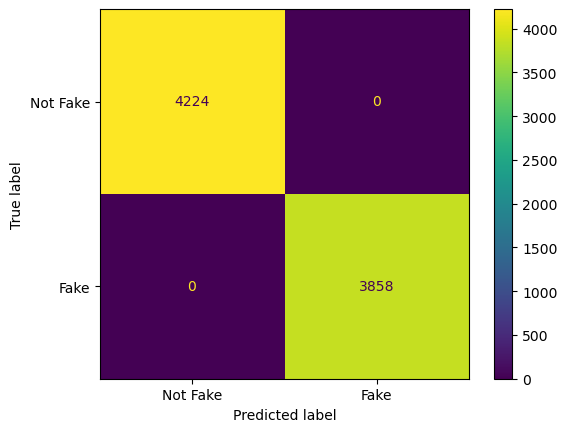

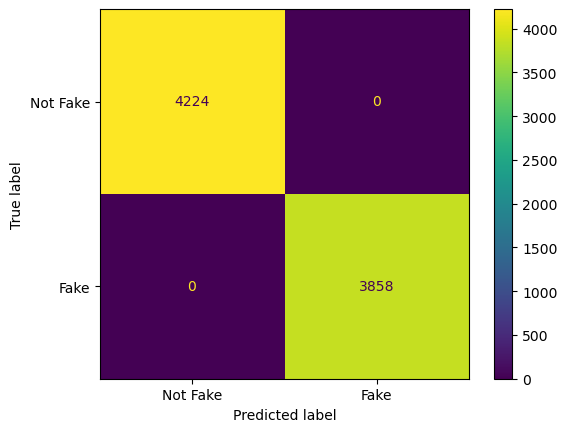

In [24]:
conf_matrix(rfc_model)

In [25]:
class_report(rfc_model)

              precision    recall  f1-score   support

    Not Fake       1.00      1.00      1.00      4224
        Fake       1.00      1.00      1.00      3858

    accuracy                           1.00      8082
   macro avg       1.00      1.00      1.00      8082
weighted avg       1.00      1.00      1.00      8082



In [ ]:
# Hasn't been run
models = pd.DataFrame({
    
    "Models": ["Logestic Regression" , "SVM", "DecisionTreeClassifier","RandomForestClassifier"],
    "Score":[model_lr.score(X_test,y_test) ,svc_model.score(X_test,y_test) ,tree_testing_acc,acc_test ]
    
})
models.sort_values(by="Score" , ascending=False)

In [ ]:
# Hasn't been run
colors= ['orange' , 'blue','red','green']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=models['Models'],y=models['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")
plt.show();

### Gradient Boosting Machines (GBM)

In [ ]:
# Hasn't been run


from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy_gbm = gbm_model.score(X_train, y_train)
test_accuracy_gbm = gbm_model.score(X_test, y_test)

print(f"Gradient Boosting Machines - Training accuracy: {train_accuracy_gbm}")
print(f"Gradient Boosting Machines - Testing accuracy: {test_accuracy_gbm}")


####  Naive Bayes (GaussianNB)

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
             
y_test=nb_model.predict(X_test)


train_accuracy_nb = nb_model.score(X_train, y_train)
test_accuracy_nb = nb_model.score(X_test, y_test)

print(f"Naive Bayes - Training accuracy: {train_accuracy_nb}")
print(f"Naive Bayes - Testing accuracy: {test_accuracy_nb}")


Naive Bayes - Training accuracy: 0.85
Naive Bayes - Testing accuracy: 1.0


### k-Nearest Neighbors (k-NN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy_knn = knn_model.score(X_train, y_train)
test_accuracy_knn = knn_model.score(X_test, y_test)

print(f"k-Nearest Neighbors - Training accuracy: {train_accuracy_knn}")
print(f"k-Nearest Neighbors - Testing accuracy: {test_accuracy_knn}")


k-Nearest Neighbors - Training accuracy: 0.885
k-Nearest Neighbors - Testing accuracy: 0.81


### Neural Networks (Multi-layer Perceptron)

In [47]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
mlp_model = MLPClassifier(random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy_mlp = mlp_model.score(X_train, y_train)
test_accuracy_mlp = mlp_model.score(X_test, y_test)

print(f"Neural Networks (MLP) - Training accuracy: {train_accuracy_mlp}")
print(f"Neural Networks (MLP) - Testing accuracy: {test_accuracy_mlp}")


Neural Networks (MLP) - Training accuracy: 0.98
Neural Networks (MLP) - Testing accuracy: 0.845


### XGB Classifier

In [42]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train,y_train)
XGB_Pred=XGB.predict(X_test)
XGB_Pred_Train=XGB.predict(X_train)


In [43]:
print("Classification Report for the test group : \n")
print(classification_report(y_test,XGB_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(y_train,XGB_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       116
           1       0.78      0.89      0.83        84

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.85       200
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       393

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800
 




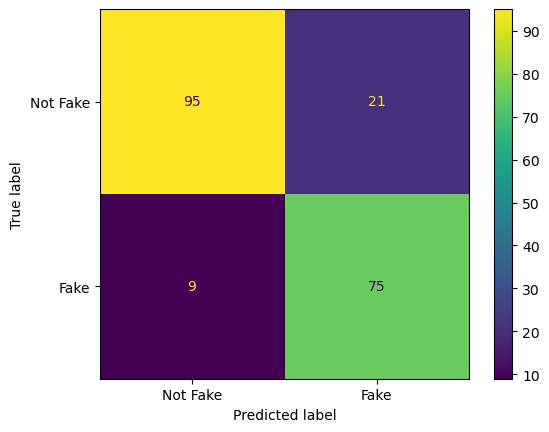

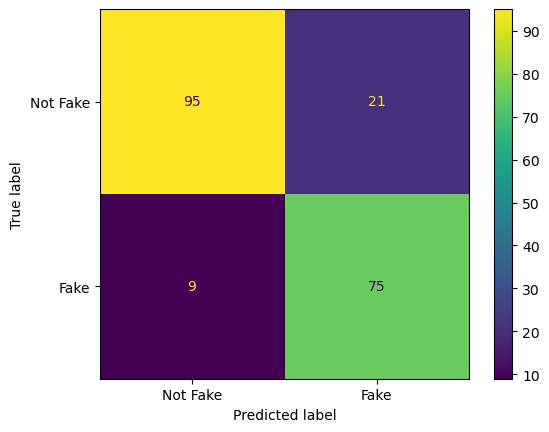

In [44]:
conf_matrix(XGB)

### LightGBM

In [54]:
import lightgbm as lgb


LGB = lgb.LGBMClassifier()
LGB.fit(X_train, y_train)
LGB_pred=LGB.predict(X_test)

# Evaluate the LightGBM model
train_accuracy_lgb = accuracy_score(y_train, LGB.predict(X_train))
test_accuracy_lgb = accuracy_score(y_test, LGB.predict(X_test))

print(f"LightGBM - Training accuracy: {train_accuracy_lgb}")
print(f"LightGBM - Testing accuracy: {test_accuracy_lgb}")


[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM - Training accuracy: 1.0
LightGBM - Testing accuracy:

In [56]:
print("Classification Report for the test group : \n")
print(classification_report(y_test,LGB_pred),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       104
           1       0.96      0.98      0.97        96

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200
 




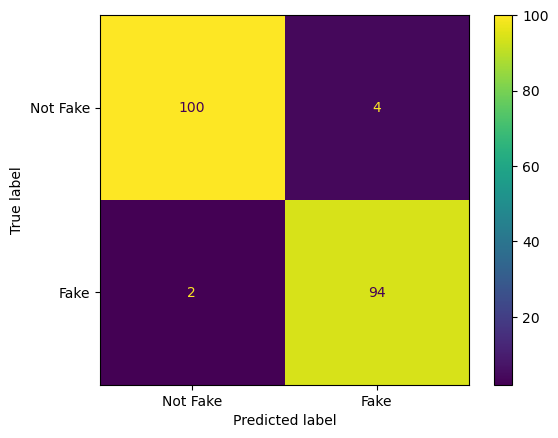

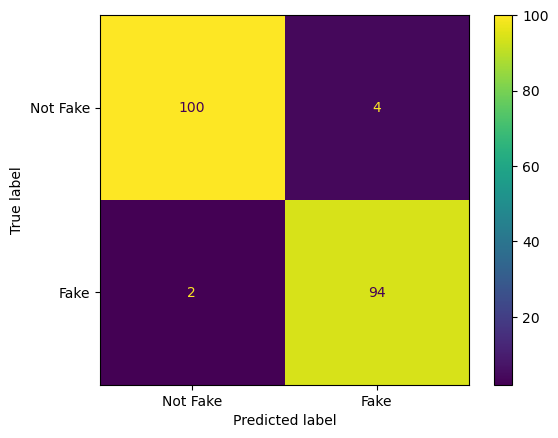

In [57]:
conf_matrix(LGB)

### Catboosting Classifier

In [58]:
from catboost import CatBoostClassifier

CB=CatBoostClassifier(bagging_temperature=0.5,depth=4 ,iterations=150,learning_rate=0.1)
CB.fit(X_train,y_train)
CB_Pred=CB.predict(X_test)
CB_Pred_Train=CB.predict(X_train)


0:	learn: 0.6004693	total: 11.1ms	remaining: 1.65s
1:	learn: 0.5270095	total: 13.8ms	remaining: 1.02s
2:	learn: 0.4802065	total: 16.6ms	remaining: 815ms
3:	learn: 0.4339308	total: 20.3ms	remaining: 741ms
4:	learn: 0.4105175	total: 22.8ms	remaining: 661ms
5:	learn: 0.3774948	total: 24.7ms	remaining: 593ms
6:	learn: 0.3604081	total: 27.3ms	remaining: 557ms
7:	learn: 0.3463057	total: 30.5ms	remaining: 542ms
8:	learn: 0.3347967	total: 32ms	remaining: 502ms
9:	learn: 0.3258993	total: 35.6ms	remaining: 498ms
10:	learn: 0.3172089	total: 38.6ms	remaining: 488ms
11:	learn: 0.3085547	total: 40.7ms	remaining: 468ms
12:	learn: 0.3019478	total: 42.4ms	remaining: 447ms
13:	learn: 0.2955784	total: 46.6ms	remaining: 452ms
14:	learn: 0.2893099	total: 48.6ms	remaining: 438ms
15:	learn: 0.2831942	total: 50.5ms	remaining: 423ms
16:	learn: 0.2792636	total: 52.4ms	remaining: 410ms
17:	learn: 0.2761115	total: 53.7ms	remaining: 394ms
18:	learn: 0.2732414	total: 55ms	remaining: 379ms
19:	learn: 0.2695862	total

In [60]:
print("Classification Report for the test group : \n")
print(classification_report(y_test,CB_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(y_train,CB_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       104
           1       0.98      0.98      0.98        96

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       0.99      0.99      0.99       393

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800
 




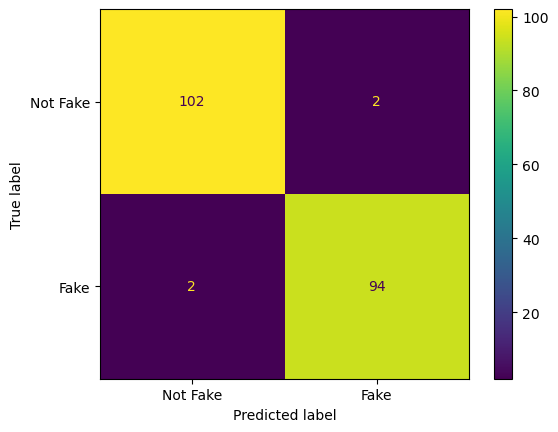

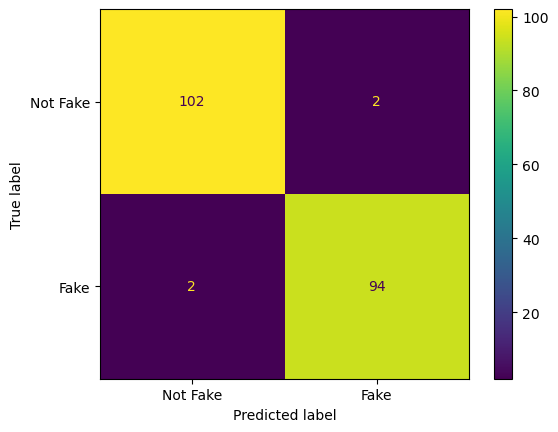

In [61]:
conf_matrix(CB)